In [65]:
import functions_new_jit as func
import importlib
importlib.reload(func)

##########################################################################################################################################

import numpy as np
import numba
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

In [66]:
%time _ = func.create_thresholds(100,25,11)

Wall time: 0 ns


In [67]:
%time _ = func.create_agents(100,25,11)

Wall time: 0 ns


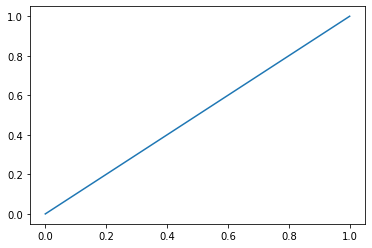

1


In [162]:
N = 1000            # number of Agents
average = 30       # average value of the normal distribution
deviation = 10     # standard deviation of the normal distribution

thresholds = func.create_thresholds(N,average,deviation)
evolution = func.simulate_riot(thresholds)
plt.figure()
plt.plot(evolution)
plt.show()

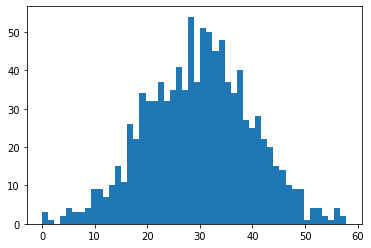

In [119]:
N=1000
average = 30
deviation = 10
thresholds = np.zeros(N)
    
# generating the values
for i in range(N):
    threshold = rd.gauss(average, deviation)     # generates a random value according with a normal distribution

    if threshold < 0:
        threshold = 0
    elif threshold > 100:
        threshold = 100

    thresholds[i] = threshold
    
plt.hist(thresholds,50)
plt.show()

100.00%


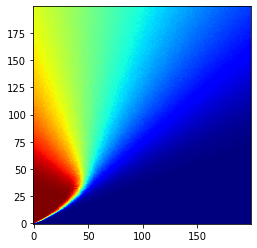

In [167]:
N = 100            # number of Agents
a = True           # negative thresholds are converted to 0

averages_sample = np.arange(0,200)  # average value of the normal distribution
deviations = np.arange(0,200)       # standard deviations of the normal distribution
simulations = 100                   # number of simulations per standard deviation value

heat_map = np.zeros((200,200))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/199)+"%"), end="\n")
    
    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            thresholds = func.create_thresholds(N,int(k),int(i))
            riot = func.simulate_riot(thresholds)
            size = riot[-1]
            average_size += size

        average_size = average_size/simulations
        heat_map[i][k] = average_size 

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

In [ ]:
# tornar o processo de " graficação" mais rápido com o @njit
@njit((numba.int64[:],numba.int64[:],numba.int64,numba.int64))
def graficar(medias, desvios, simulacoes, steps):
    